In [1]:
import os
import uproot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

#os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

from keras.models import Sequential
from keras.layers import Dense

from keras.models import Model
from keras.layers import Dense, Input, Dropout, MaxPooling2D, Flatten
from keras import regularizers
from keras.layers.merge import concatenate

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from scipy.stats import ks_2samp

os.chdir('../src/')
import ml_analysis_plotting

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

The cell below accesses and orients the input arrays correctly

In [2]:
def  get_input_arrays(tree, features_list):
    array = np.transpose(tree.arrays(features_list, outputtype=tuple))
    print(array.shape)
    print(array[0])
    return array

In [3]:
os.chdir('../data')

In [4]:
#tree1 = uproot.open('user.pavol.19077317._000001.reco_copy.root')[b'newtree;1']
#tree2 = uproot.open('spin_data_01.root')[b'spin_truth;1']
#tree1 = uproot.open('user.fisopkov.19389493._000001.reco_copy.root')[b'spin_truth;1']
#tree = uproot.open('full_spin_04_big.root')[b'spin_truth;1']
tree = uproot.open('full_spin_03_small.root')[b'spin_truth;1']
tree.keys()

[b't_pt',
 b't_eta',
 b't_phi',
 b't_m',
 b'tbar_pt',
 b'tbar_eta',
 b'tbar_phi',
 b'tbar_m',
 b'lep_t_pt',
 b'lep_t_eta',
 b'lep_t_phi',
 b'lep_t_m',
 b'lep_tbar_pt',
 b'lep_tbar_eta',
 b'lep_tbar_phi',
 b'lep_tbar_m',
 b'nu_t_pt',
 b'nu_t_eta',
 b'nu_t_phi',
 b'nu_t_m',
 b'nu_tbar_pt',
 b'nu_tbar_eta',
 b'nu_tbar_phi',
 b'nu_tbar_m',
 b'b1_pt',
 b'b1_eta',
 b'b1_phi',
 b'b1_m',
 b'b2_pt',
 b'b2_eta',
 b'b2_phi',
 b'b2_m',
 b'ttbar_pt',
 b'ttbar_eta',
 b'ttbar_phi',
 b'ttbar_m',
 b'met',
 b'met_x',
 b'met_y',
 b'reco_t_pt',
 b'reco_t_eta',
 b'reco_t_phi',
 b'reco_t_m',
 b'reco_tbar_pt',
 b'reco_tbar_eta',
 b'reco_tbar_phi',
 b'reco_tbar_m',
 b'reco_lep_1_pt',
 b'reco_lep_1_eta',
 b'reco_lep_1_phi',
 b'reco_lep_1_e',
 b'reco_lep_2_pt',
 b'reco_lep_2_eta',
 b'reco_lep_2_phi',
 b'reco_lep_2_e',
 b'kk',
 b'kk_01',
 b'kk_02',
 b'kk_03',
 b'kk_04',
 b'kk_05',
 b'kk_06',
 b'kk_07',
 b'kk_08',
 b'kk_09',
 b'kk_10',
 b'kk_11',
 b'kk_12',
 b'kk_13',
 b'kk_14',
 b'kk_15',
 b'kk_16',
 b'kk_17',
 

In [5]:
'''
a = tree1.array(b'kk')
b = tree2.array(b'kk')
c = tree3.array(b'kk')
_=plt.hist(a, bins=40, density=True, histtype='step', linewidth=2., label='1')
plt.legend()
plt.show()
_=plt.hist(b, bins=40, density=True, histtype='step', linewidth=2., label='2')
plt.legend()
plt.show()
_=plt.hist(c, bins=40, density=True, histtype='step', linewidth=2., label='3')
plt.legend()
plt.show()
'''

"\na = tree1.array(b'kk')\nb = tree2.array(b'kk')\nc = tree3.array(b'kk')\n_=plt.hist(a, bins=40, density=True, histtype='step', linewidth=2., label='1')\nplt.legend()\nplt.show()\n_=plt.hist(b, bins=40, density=True, histtype='step', linewidth=2., label='2')\nplt.legend()\nplt.show()\n_=plt.hist(c, bins=40, density=True, histtype='step', linewidth=2., label='3')\nplt.legend()\nplt.show()\n"

In [6]:
'''
fig, ax = plt.subplots(figsize=(20,10))
bins=np.histogram(np.hstack((a,b,c)), bins=40)[1]
_=plt.hist(a, bins, density=True, histtype='step', linewidth=2.)
_=plt.hist(b, bins, density=True, histtype='step', linewidth=2.)
_=plt.hist(c, bins, density=True, histtype='step', linewidth=2.)
'''

"\nfig, ax = plt.subplots(figsize=(20,10))\nbins=np.histogram(np.hstack((a,b,c)), bins=40)[1]\n_=plt.hist(a, bins, density=True, histtype='step', linewidth=2.)\n_=plt.hist(b, bins, density=True, histtype='step', linewidth=2.)\n_=plt.hist(c, bins, density=True, histtype='step', linewidth=2.)\n"

In [30]:
features_list = [b'b1_pt',
 b'b1_eta',
 b'b1_phi',
 b'b2_pt',
 b'b2_eta',
 b'b2_phi',
 b'met_x',
 b'met_y',
 b'lep_t_pt',
 b'lep_t_eta',
 b'lep_t_phi',
 b'lep_tbar_pt',
 b'lep_tbar_eta',
 b'lep_tbar_phi']

[  38.  102.  186.  279.  406.  599.  847. 1163. 1482. 1993. 2767. 4111.
 7542. 4469. 3033. 2247. 1736. 1347.  994.  712.  519.  328.  223.  150.
   41.]
[-0.98294424 -0.90464225 -0.82634025 -0.74803826 -0.66973627 -0.59143428
 -0.51313229 -0.4348303  -0.3565283  -0.27822631 -0.19992432 -0.12162233
 -0.04332034  0.03498165  0.11328365  0.19158564  0.26988763  0.34818962
  0.42649161  0.5047936   0.5830956   0.66139759  0.73969958  0.81800157
  0.89630356  0.97460555]


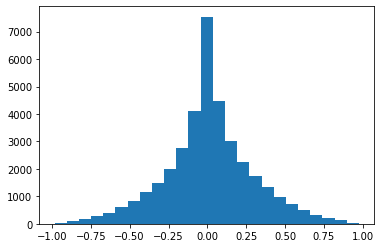

In [31]:
spin_target = tree.array(b'kk')#[np.where(spin_target !=  -10.)[0]]
#pt_cut = np.where(spin_target/1000.0 < 300.)[0]
#spin_target = spin_target[pt_cut]
h,b,_=plt.hist(spin_target, bins=25)
print(h)
print(b)

In [32]:
np.where(spin_target ==  -10.)[0]

array([], dtype=int64)

b'b1_pt'


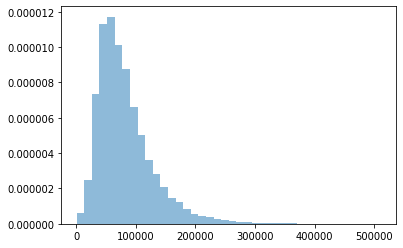

b'b1_eta'


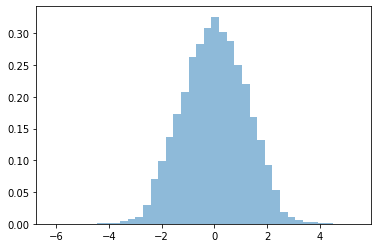

b'b1_phi'


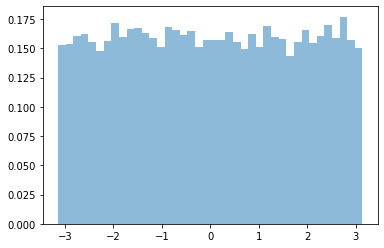

b'b2_pt'


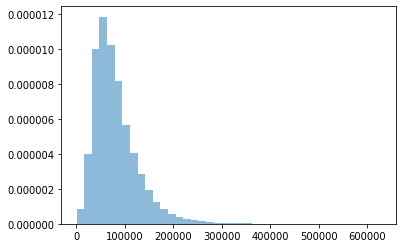

b'b2_eta'


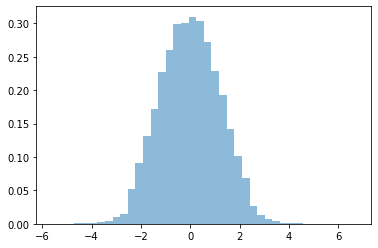

b'b2_phi'


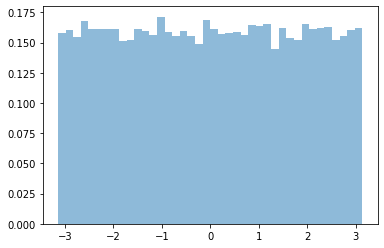

b'met_x'


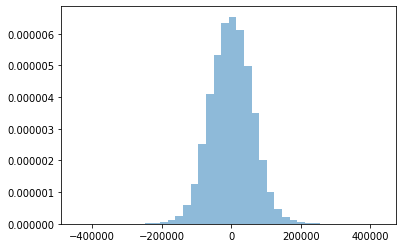

b'met_y'


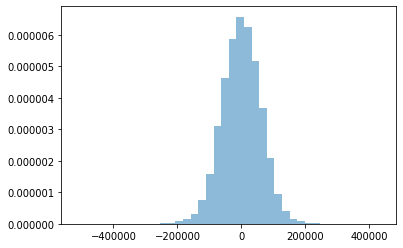

b'lep_t_pt'


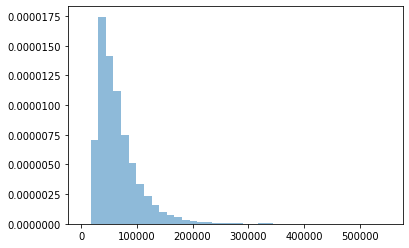

b'lep_t_eta'


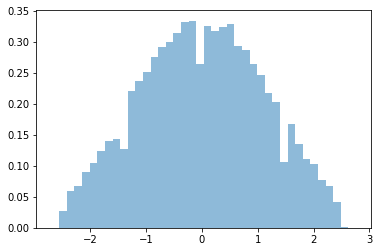

b'lep_t_phi'


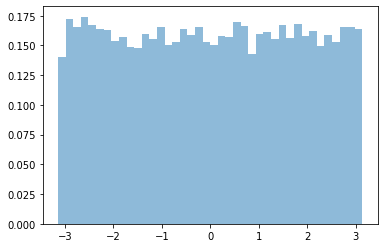

b'lep_tbar_pt'


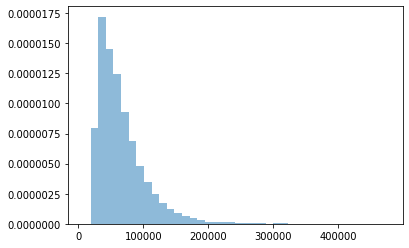

b'lep_tbar_eta'


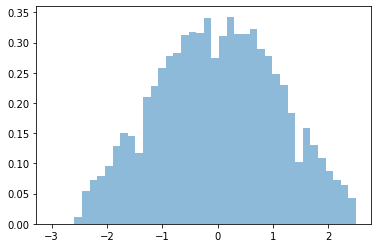

b'lep_tbar_phi'


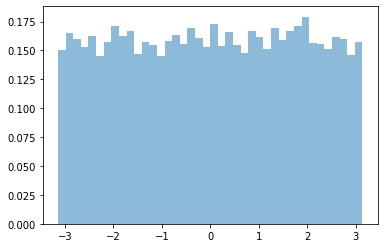

In [33]:
for feature in features_list:
    print(feature)
    #plt.hist(tree1.array(feature),bins=40,density=True,alpha=.8)
    plt.hist(tree.array(feature),bins=40,density=True,alpha=.5)
    plt.show()

In [34]:
spin_weights = 1/(h * 1/np.max(h))
print(spin_weights)
locs = np.digitize(spin_target, b)
weights_array = np.zeros(len(spin_target))
for i in range(len(spin_weights)):
    weights_array[np.where(locs == i+1)[0]] = spin_weights[i]

[198.47368421  73.94117647  40.5483871   27.03225806  18.57635468
  12.59098497   8.90436836   6.48495271   5.08906883   3.78424486
   2.7256957    1.83459012   1.           1.68762587   2.48664688
   3.3564753    4.34447005   5.59910913   7.58752515  10.59269663
  14.53179191  22.99390244  33.8206278   50.28       183.95121951]


### This scales the target in order for the ML to be successful

In [35]:
spin_transformer = RobustScaler()
spin_target_scaled = spin_transformer.fit_transform(spin_target.reshape(-1,1))
spin_target_scaled = (spin_target_scaled - np.min(spin_target_scaled))/(np.max(spin_target_scaled) - np.min(spin_target_scaled))
print(spin_target_scaled.shape)

(37314, 1)


In [36]:
features_array = get_input_arrays(tree, features_list)

(37314, 14)
[ 1.22962891e+05  1.35190809e+00  1.26099980e+00  9.05091172e+04
  7.77754486e-01 -2.21366072e+00  7.14950150e+04 -3.32614211e+04
  4.08774492e+04  1.37478495e+00 -2.88719773e+00  8.45128125e+04
  2.04716468e+00 -2.02554274e+00]


In [37]:
np.where(np.isnan(features_array) == True)

(array([], dtype=int64), array([], dtype=int64))

In [38]:
transformer = RobustScaler()
features_array_scaled = transformer.fit_transform(features_array)
print(features_array_scaled.shape)

(37314, 14)


In [39]:
model = Sequential()
model.add(Dense(200, input_dim=len(features_list), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [40]:
'''
def multihead_model(features_list):

    t_input = Input(shape=(features_list), name="t_input")
    
    nu_input = Input(shape=(features_list), name="nu_input")
    
    t1 = Dense(200, activation="relu")(t_input)
    #x2 = Dropout(0.2)(x2)
    t2 = Dense(100, activation="relu")(t1)
    #x2 = Dropout(0.2)(x2)
    t3 = Dense(50, activation="relu")(t2)
    #x2 = Dropout(0.2)(x2)
    
    nu1 = Dense(200, activation="relu")(nu_input)
    #x2 = Dropout(0.2)(x2)
    nu2 = Dense(100, activation="relu")(nu1)
    #x2 = Dropout(0.2)(x2)
    nu3 = Dense(50, activation="relu")(nu2)
    #x2 = Dropout(0.2)(x2)

    x = concatenate([t3, nu3])

    x = Dense(25, activation="relu")(x)
    #x = Dropout(0.2)(x)
    #x = Dense(32, activation="relu")(x)
    #x = Dropout(0.2)(x)

    output = Dense(1, activation="sigmoid", name="main_output")(x)

    model = Model(inputs=[t_input, nu_input], outputs=output)

    return model
'''

'\ndef multihead_model(features_list):\n\n    t_input = Input(shape=(features_list), name="t_input")\n    \n    nu_input = Input(shape=(features_list), name="nu_input")\n    \n    t1 = Dense(200, activation="relu")(t_input)\n    #x2 = Dropout(0.2)(x2)\n    t2 = Dense(100, activation="relu")(t1)\n    #x2 = Dropout(0.2)(x2)\n    t3 = Dense(50, activation="relu")(t2)\n    #x2 = Dropout(0.2)(x2)\n    \n    nu1 = Dense(200, activation="relu")(nu_input)\n    #x2 = Dropout(0.2)(x2)\n    nu2 = Dense(100, activation="relu")(nu1)\n    #x2 = Dropout(0.2)(x2)\n    nu3 = Dense(50, activation="relu")(nu2)\n    #x2 = Dropout(0.2)(x2)\n\n    x = concatenate([t3, nu3])\n\n    x = Dense(25, activation="relu")(x)\n    #x = Dropout(0.2)(x)\n    #x = Dense(32, activation="relu")(x)\n    #x = Dropout(0.2)(x)\n\n    output = Dense(1, activation="sigmoid", name="main_output")(x)\n\n    model = Model(inputs=[t_input, nu_input], outputs=output)\n\n    return model\n'

In [18]:
#model = multihead_model(features_list)

In [41]:
model.compile(loss='logcosh', optimizer='adam', metrics=['mae', 'mse'])

In [42]:
features_array_scaled, spin_target_scaled = shuffle(features_array_scaled, spin_target_scaled)

In [43]:
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(features_array_scaled, spin_target_scaled, weights_array, test_size=0.2)

## If you don't redefine/compile/build the model, the weights are 'updated' from the previous training

In [44]:
history = model.fit(X_train, y_train, epochs=300, batch_size=256, verbose=1, validation_split=.2, sample_weight=w_train)
'''
histories = []
for i in range(10):
    print("Epoch: "+str(int(i*50+1)))
    history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=2, validation_split=.1)
    print("Evaluating:")
    print(model.evaluate(X_test, y_test))
    histories.append(history.history['loss'])
'''

Train on 23880 samples, validate on 5971 samples
Epoch 1/300
23880/23880 [==============================] - 1s 26us/step - loss: 0.0570 - mae: 0.1154 - mse: 0.0238 - val_loss: 0.0539 - val_mae: 0.1056 - val_mse: 0.0213
Epoch 2/300
23880/23880 [==============================] - 0s 15us/step - loss: 0.0528 - mae: 0.1094 - mse: 0.0220 - val_loss: 0.0537 - val_mae: 0.1056 - val_mse: 0.0212
Epoch 3/300
23880/23880 [==============================] - 0s 16us/step - loss: 0.0518 - mae: 0.1083 - mse: 0.0217 - val_loss: 0.0536 - val_mae: 0.1055 - val_mse: 0.0212
Epoch 4/300
23880/23880 [==============================] - 0s 17us/step - loss: 0.0517 - mae: 0.1081 - mse: 0.0216 - val_loss: 0.0535 - val_mae: 0.1056 - val_mse: 0.0211
Epoch 5/300
23880/23880 [==============================] - 0s 17us/step - loss: 0.0512 - mae: 0.1076 - mse: 0.0215 - val_loss: 0.0532 - val_mae: 0.1054 - val_mse: 0.0210
Epoch 6/300
23880/23880 [==============================] - 0s 17us/step - loss: 0.0508 - mae: 0.1076 

Epoch 49/300
23880/23880 [==============================] - 0s 17us/step - loss: 0.0420 - mae: 0.1027 - mse: 0.0186 - val_loss: 0.0420 - val_mae: 0.0978 - val_mse: 0.0171
Epoch 50/300
23880/23880 [==============================] - 0s 16us/step - loss: 0.0415 - mae: 0.1030 - mse: 0.0186 - val_loss: 0.0428 - val_mae: 0.0978 - val_mse: 0.0174
Epoch 51/300
23880/23880 [==============================] - 0s 19us/step - loss: 0.0416 - mae: 0.1030 - mse: 0.0185 - val_loss: 0.0430 - val_mae: 0.0976 - val_mse: 0.0174
Epoch 52/300
23880/23880 [==============================] - 0s 17us/step - loss: 0.0419 - mae: 0.1027 - mse: 0.0185 - val_loss: 0.0420 - val_mae: 0.0972 - val_mse: 0.0171
Epoch 53/300
23880/23880 [==============================] - 0s 18us/step - loss: 0.0412 - mae: 0.1022 - mse: 0.0184 - val_loss: 0.0421 - val_mae: 0.0973 - val_mse: 0.0171
Epoch 54/300
23880/23880 [==============================] - 0s 16us/step - loss: 0.0418 - mae: 0.1024 - mse: 0.0184 - val_loss: 0.0418 - val_mae:

Epoch 97/300
23880/23880 [==============================] - 0s 16us/step - loss: 0.0385 - mae: 0.1004 - mse: 0.0176 - val_loss: 0.0402 - val_mae: 0.0952 - val_mse: 0.0165
Epoch 98/300
23880/23880 [==============================] - 0s 17us/step - loss: 0.0382 - mae: 0.0997 - mse: 0.0175 - val_loss: 0.0401 - val_mae: 0.0950 - val_mse: 0.0164
Epoch 99/300
23880/23880 [==============================] - 0s 16us/step - loss: 0.0382 - mae: 0.1001 - mse: 0.0176 - val_loss: 0.0407 - val_mae: 0.0954 - val_mse: 0.0166
Epoch 100/300
23880/23880 [==============================] - 0s 16us/step - loss: 0.0381 - mae: 0.0998 - mse: 0.0175 - val_loss: 0.0408 - val_mae: 0.0951 - val_mse: 0.0166
Epoch 101/300
23880/23880 [==============================] - 0s 18us/step - loss: 0.0387 - mae: 0.1001 - mse: 0.0175 - val_loss: 0.0399 - val_mae: 0.0948 - val_mse: 0.0163
Epoch 102/300
23880/23880 [==============================] - 0s 17us/step - loss: 0.0385 - mae: 0.1004 - mse: 0.0177 - val_loss: 0.0398 - val_m

Epoch 145/300
23880/23880 [==============================] - 0s 15us/step - loss: 0.0363 - mae: 0.0986 - mse: 0.0170 - val_loss: 0.0385 - val_mae: 0.0935 - val_mse: 0.0158
Epoch 146/300
23880/23880 [==============================] - 0s 16us/step - loss: 0.0358 - mae: 0.0988 - mse: 0.0171 - val_loss: 0.0390 - val_mae: 0.0939 - val_mse: 0.0159
Epoch 147/300
23880/23880 [==============================] - 0s 15us/step - loss: 0.0356 - mae: 0.0987 - mse: 0.0171 - val_loss: 0.0388 - val_mae: 0.0936 - val_mse: 0.0159
Epoch 148/300
23880/23880 [==============================] - 0s 16us/step - loss: 0.0359 - mae: 0.0984 - mse: 0.0170 - val_loss: 0.0385 - val_mae: 0.0935 - val_mse: 0.0159
Epoch 149/300
23880/23880 [==============================] - 0s 15us/step - loss: 0.0358 - mae: 0.0982 - mse: 0.0169 - val_loss: 0.0383 - val_mae: 0.0937 - val_mse: 0.0158
Epoch 150/300
23880/23880 [==============================] - 0s 16us/step - loss: 0.0359 - mae: 0.0981 - mse: 0.0170 - val_loss: 0.0388 - va

23880/23880 [==============================] - 0s 16us/step - loss: 0.0347 - mae: 0.0976 - mse: 0.0167 - val_loss: 0.0386 - val_mae: 0.0930 - val_mse: 0.0157
Epoch 193/300
23880/23880 [==============================] - 0s 16us/step - loss: 0.0343 - mae: 0.0974 - mse: 0.0166 - val_loss: 0.0383 - val_mae: 0.0928 - val_mse: 0.0156
Epoch 194/300
23880/23880 [==============================] - 0s 16us/step - loss: 0.0347 - mae: 0.0977 - mse: 0.0166 - val_loss: 0.0389 - val_mae: 0.0933 - val_mse: 0.0158
Epoch 195/300
23880/23880 [==============================] - 0s 16us/step - loss: 0.0343 - mae: 0.0975 - mse: 0.0166 - val_loss: 0.0378 - val_mae: 0.0928 - val_mse: 0.0155
Epoch 196/300
23880/23880 [==============================] - 0s 16us/step - loss: 0.0349 - mae: 0.0973 - mse: 0.0166 - val_loss: 0.0381 - val_mae: 0.0929 - val_mse: 0.0156
Epoch 197/300
23880/23880 [==============================] - 0s 16us/step - loss: 0.0353 - mae: 0.0981 - mse: 0.0168 - val_loss: 0.0389 - val_mae: 0.0932 

Epoch 240/300
23880/23880 [==============================] - 0s 16us/step - loss: 0.0338 - mae: 0.0967 - mse: 0.0162 - val_loss: 0.0374 - val_mae: 0.0922 - val_mse: 0.0153
Epoch 241/300
23880/23880 [==============================] - 0s 16us/step - loss: 0.0345 - mae: 0.0973 - mse: 0.0165 - val_loss: 0.0372 - val_mae: 0.0921 - val_mse: 0.0153
Epoch 242/300
23880/23880 [==============================] - 0s 16us/step - loss: 0.0345 - mae: 0.0971 - mse: 0.0165 - val_loss: 0.0379 - val_mae: 0.0921 - val_mse: 0.0155
Epoch 243/300
23880/23880 [==============================] - 0s 16us/step - loss: 0.0336 - mae: 0.0965 - mse: 0.0164 - val_loss: 0.0372 - val_mae: 0.0918 - val_mse: 0.0153
Epoch 244/300
23880/23880 [==============================] - 0s 16us/step - loss: 0.0339 - mae: 0.0971 - mse: 0.0164 - val_loss: 0.0373 - val_mae: 0.0921 - val_mse: 0.0154
Epoch 245/300
23880/23880 [==============================] - 0s 16us/step - loss: 0.0338 - mae: 0.0967 - mse: 0.0163 - val_loss: 0.0370 - va

23880/23880 [==============================] - 0s 16us/step - loss: 0.0327 - mae: 0.0961 - mse: 0.0162 - val_loss: 0.0375 - val_mae: 0.0918 - val_mse: 0.0153
Epoch 288/300
23880/23880 [==============================] - 0s 16us/step - loss: 0.0325 - mae: 0.0960 - mse: 0.0162 - val_loss: 0.0369 - val_mae: 0.0916 - val_mse: 0.0152
Epoch 289/300
23880/23880 [==============================] - 0s 16us/step - loss: 0.0325 - mae: 0.0957 - mse: 0.0160 - val_loss: 0.0370 - val_mae: 0.0915 - val_mse: 0.0152
Epoch 290/300
23880/23880 [==============================] - 0s 16us/step - loss: 0.0334 - mae: 0.0967 - mse: 0.0163 - val_loss: 0.0379 - val_mae: 0.0919 - val_mse: 0.0154
Epoch 291/300
23880/23880 [==============================] - 0s 16us/step - loss: 0.0335 - mae: 0.0962 - mse: 0.0163 - val_loss: 0.0370 - val_mae: 0.0912 - val_mse: 0.0151
Epoch 292/300
23880/23880 [==============================] - 0s 16us/step - loss: 0.0332 - mae: 0.0963 - mse: 0.0162 - val_loss: 0.0373 - val_mae: 0.0915 

'\nhistories = []\nfor i in range(10):\n    print("Epoch: "+str(int(i*50+1)))\n    history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=2, validation_split=.1)\n    print("Evaluating:")\n    print(model.evaluate(X_test, y_test))\n    histories.append(history.history[\'loss\'])\n'

In [23]:
model.save_weights('model_weights.h5')

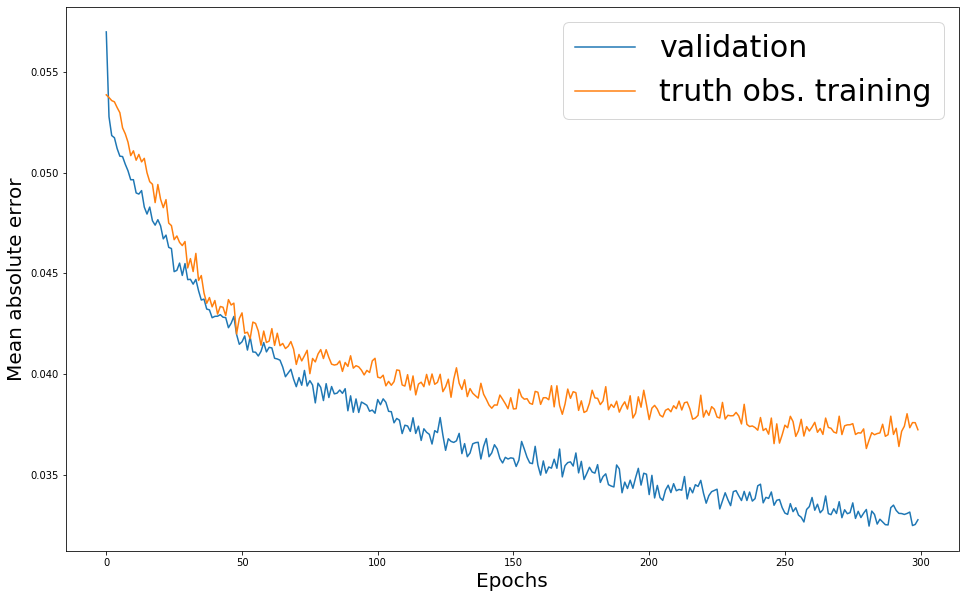

In [47]:
fig, ax = plt.subplots(figsize=(16, 10))
'''
for i in range(1):
    plt.scatter(range(len(histories[i])), histories[i])
'''
#history_hist = plt.hist(history.history['loss'], bins=50)
plt.plot(range(len(history.history['loss'])), history.history['loss'], label='validation')
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='truth obs. training')
plt.legend(fontsize=30)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Mean absolute error', fontsize=20)
plt.savefig('truth_obs_mae')
plt.show()

In [46]:
y_pred = model.predict(X_test)
print(model.evaluate(X_test, y_test))

7463/7463 [==============================] - 0s 23us/step
[0.007535674648802929, 0.09258560836315155, 0.01521291397511959]


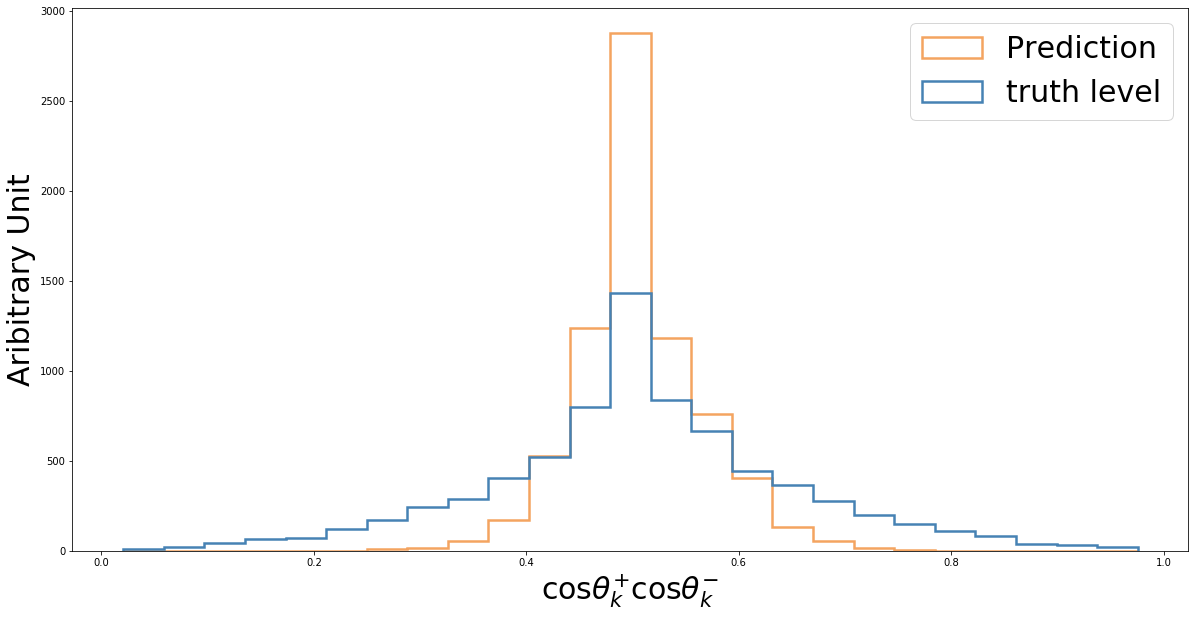

In [48]:
fig, ax = plt.subplots(figsize=(20,10))
a = y_pred
b = y_test
bins=np.histogram(np.hstack((a,b)), bins=25)[1]
h1,b1,_=plt.hist(a, bins, histtype='step', linewidth=2.5, label='Prediction', color='sandybrown')
h2,b2,_=plt.hist(b, bins, histtype='step', linewidth=2.5, label='truth level', color='steelblue')
plt.legend(fontsize=30)
plt.xlabel(r'cos$\theta_{k}^{+}$cos$\theta_{k}^{-}$', fontsize=30)
plt.ylabel('Aribitrary Unit', fontsize=30)
plt.savefig('truth_obs_pred')
plt.show()

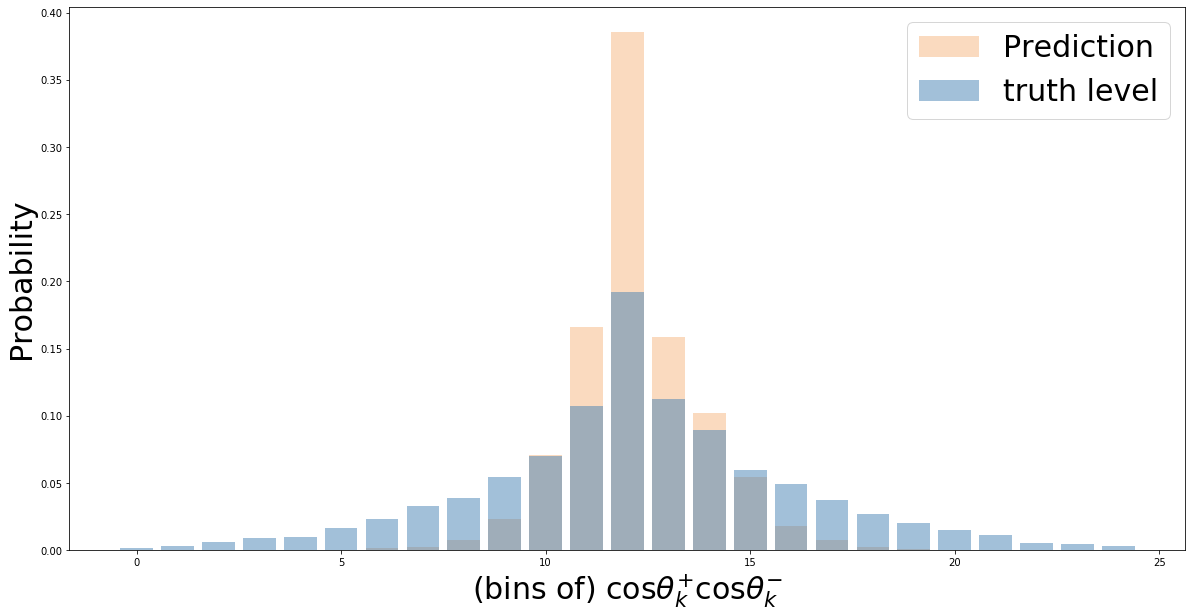

In [49]:
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(range(len(h1)),h1/len(a),alpha=.4, color='sandybrown', label='Prediction')
plt.bar(range(len(h2)),h2/len(b),alpha=.5, color='steelblue', label='truth level')
plt.legend(fontsize=30)
plt.xlabel(r'(bins of) cos$\theta_{k}^{+}$cos$\theta_{k}^{-}$', fontsize=30)
plt.ylabel('Probability', fontsize=30)
plt.savefig('truth_obs_prob')
plt.show()

In [59]:
class make_hist_dicts:

    def correct_compare_hist(self,
        array1, array2, nBins=40, normed=False, gauss=False, logY=False
    ):
        array1_dict = {"hist":None, "binx":None, "weights":None, "binDx":None}
        array2_dict = {"hist":None, "binx":None, "weights":None, "binDx":None}

        array1 = self.removeNan(array1)
        array2 = self.removeNan(array2)

        if gauss is True:
            ratio = guassian_comparison_ratio(array1, array2, nBins)
        else:
            ratio = np.ones(nBins)
        
        hist1, bins1, hist2, bins2 = self.get_hists(array2, array1, nBins)
        
        stat = np.round(ks_2samp(plt.hist(array1, bins=nBins)[0], plt.hist(array2, bins=nBins)[0]), 4)
        plt.close()
        b1 = np.zeros(len(hist1))
        w1 = np.zeros(len(hist1))
        for i in range(len(hist1)):
            b1[i] = (bins1[i + 1] + bins1[i]) / 2
            w1[i] = bins1[i + 1] - bins1[i]
        b2 = b1
        w2 = w1
        
        array1_dict["binDx"] = w1
        array2_dict["binDx"] = w2
        
        array1_dict["hist"] = hist1
        array2_dict["hist"] = hist2
        
        array1_dict["binx"] = b1
        array2_dict["binx"] = b2
        
        hist1 = np.multiply(hist1, ratio)
        hist2 = np.multiply(hist2, ratio)

        weights1 = self.get_weights(array1, bins1, ratio)
        weights2 = self.get_weights(array2, bins2, ratio)
        
        array1_dict["weights"] = weights1
        array2_dict["weights"] = weights2

        if normed is False:
            scale1 = np.maximum(np.max(hist1), np.max(hist2))
            scale2 = scale1
        else:
            scale1 = np.max(hist1)
            scale2 = np.max(hist2)
        
        #error = hist2/len(array2)
        error = 1./hist2    
        fig, ax = plt.subplots(figsize=(16, 10))
        plt.cla()
        if logY is True:
            ax.set_yscale("log")
        ax.set_title("Regression Analysis - model 3, Batches", fontsize=35)
        ax.set_xlabel("kk", fontsize=24)
        ax.set_ylabel("Arbitraty Units", fontsize=24)
        plt.bar(b1, hist1 / scale1, width=w1, alpha=0.2, color="blue", label="Truth")
        plt.bar(b2, hist2 / scale2, width=w2, yerr=error, alpha=0.2, color="red", label="Prediction")
        plt.bar(
            b1,
            hist1 / scale1,
            width=w1,
            alpha=1.0,
            color="none",
            edgecolor="blue",
            linewidth=2.0,
        )
        plt.bar(
            b2,
            hist2 / scale2,
            width=w2,
            alpha=1.0,
            color="none",
            edgecolor="red",
            linewidth=2.0,
        )
        plt.annotate("Kolmogorov–Smirnov", (.7,.94), fontsize=24)
        plt.annotate("Statistic: "+str(stat[0]), (.75,.87), fontsize=24)
        plt.annotate("P-value: "+str(stat[1]), (.75,.80), fontsize=24)
        plt.legend(fontsize=24)
        plt.ylim(0,1.2)
        plt.show()
        
        return array1_dict, array2_dict, ratio

    def removeNan(self,array):
        if len(np.where(np.isnan(array) is True)) == 0:
            pass
        return array[np.logical_not(np.isnan(array))]

    def get_hists(self, array1, array2, nBins):

        """
        array1 = (
            2 * (array1 - np.min(array1)) / (np.max(array1) - np.min(array1)) - 1
        )
        array2 = (
            2 * (array2 - np.min(array2)) / (np.max(array2) - np.min(array2)) - 1
        )
        """

        hist1, bins1, _ = plt.hist(
            array2, color="blue", alpha=0.2, bins=nBins
        )  # , weights=true_z_w)
        plt.close()
        bins2 = bins1
        hist2 = np.zeros(len(hist1))

        # z_reg = np.multiply(test_z_torch.data.numpy().reshape(1000), test_z_w)
        # z_reg = test_z_torch.data.numpy().reshape(len(true_z))
        # z_reg = test_z_torch

        for i in range(len(hist1)):
            hist2[i] = len(
                np.where(array1[np.where((array1 <= bins1[i + 1]))[0]] > bins1[i])[0]
            )  # & (z_reg > bins1[i])[0])]))
            if i == len(hist1):
                hist2[i] = len(np.where(array1 >= bins1[i])[0])
        return hist1, bins1, hist2, bins2

    def get_weights(self, array, bins, ratio):

        weights = np.zeros(len(array))
        bins = np.digitize(array, bins)

        for i in range(len(ratio)):
            weights[np.where(bins == i)] = ratio[i]

        return weights

/Users/blakeforland/.local/share/virtualenvs/spinformation-HNa3-Rh0/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in true_divide


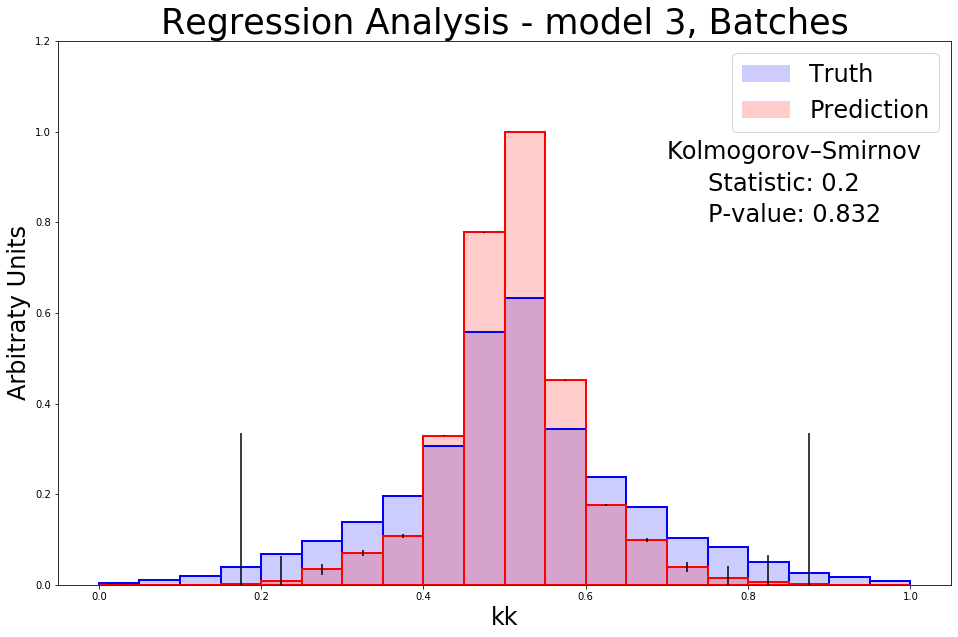

In [60]:
y_y = spin_transformer.fit_transform(y_test.reshape(-1,1))
y_y = (y_y - np.min(y_y))/(np.max(y_y) - np.min(y_y))
comp = make_hist_dicts()
hist1, hist2, ratio = comp.correct_compare_hist(y_y, y_pred, nBins=20)